Scaling and Clustering of the spotify library:

In [1]:
import scalingclustering
from scalingclustering import load_playlist_pkl, yellowbricking, apply_scaler, apply_kmeans, predict_kmeans, elbowing, silhouetting, save_pkl, load_pkl
import pandas as pd
import datetime
import seaborn as sns


In [2]:
sp_library = load_playlist_pkl()

In [23]:
sp_library.shape

(5404, 22)

In [4]:
pl_dict = {}
i = 0
for index in sp_library['playlistID'].value_counts().index:
    pl_dict[index] = i
    i += 1

In [5]:
for pl_id in sp_library['playlistID']:
    sp_library['playlistnr'] = pl_dict[pl_id]
   

In [6]:
sp_library['Year'] = pd.to_datetime(sp_library['ReleaseYear'], format='%Y-%m-%d')
sp_library['Year'] = pd.DatetimeIndex(sp_library['Year']).year

Columns for clustering:
'danceability'
'energy'
'loudness'
'speechiness'  # detects the presence of spoken words in a track
'acousticness'
'instrumentalness'
'liveness'  # Detects the presence of an audience in the recording
'valence'  # A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
'tempo'


Add later when data exists:
'time_signature'
'popularity'

In [7]:
X = sp_library[['danceability',
                'energy',
                'loudness',
                'speechiness',
                'acousticness',
               'instrumentalness',
               'liveness', 
                'valence',  
                'tempo',
                'Year',
                'Popularity']]

In [8]:
X_scaled_df, scaler = apply_scaler(X)
save_pkl(scaler, filename = "model/scalerKmeans.pickle")


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,Popularity
0,0.52,0.731,-5.338,0.0557,0.342,0.00101,0.311,0.662,173.93,2022,100.0
1,0.905,0.563,-6.135,0.102,0.0254,0.00001,0.113,0.324,106.998,2022,95.0
2,0.761,0.525,-6.9,0.0944,0.44,0.000007,0.0921,0.531,80.87,2020,90.0
3,0.591,0.764,-5.484,0.0483,0.0383,0,0.103,0.478,169.928,2021,88.0
4,0.728,0.783,-4.424,0.266,0.237,0,0.434,0.555,77.011,2021,85.0


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,Popularity
0,-0.540781,0.585467,0.879650,-0.396468,0.092363,-1.189347,1.074365,1.047418,1.887525,0.479463,3.248924
1,1.600573,-0.085920,0.723379,0.102108,-0.865033,-1.191842,-0.393048,-0.239670,-0.396171,0.479463,2.975228
2,0.799651,-0.237782,0.573383,0.020268,0.388714,-1.191849,-0.547941,0.548576,-1.287649,0.275894,2.701533
3,-0.145882,0.717346,0.851023,-0.476154,-0.826023,-1.191866,-0.467159,0.346755,1.750978,0.377679,2.592054
4,0.616107,0.793277,1.058862,1.868119,-0.225156,-1.191866,1.985939,0.639967,-1.419317,0.377679,2.427837


In [9]:
n=9
kmeans = apply_kmeans(X_scaled_df, n)
kmeans.labels_

save_pkl(kmeans, filename = 'model/modelKmeans.pickle')

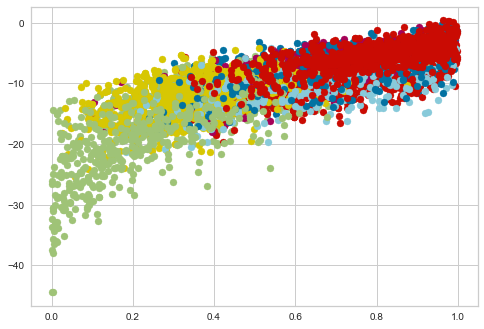

In [10]:
labels, clusters = predict_kmeans(X_scaled_df, X, kmeans)

In [11]:
clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
labels

array([8, 0, 0, ..., 6, 2, 2])

In [13]:
#clusters
pd.Series(labels).value_counts().sort_index()

0     828
1     591
2    1033
3     363
4     821
5     328
6     285
7     396
8     759
dtype: int64

In [14]:
#X_df = pd.DataFrame(X)
X["label"] = labels
sp_library['label'] = labels

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11968\735925573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = labels


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



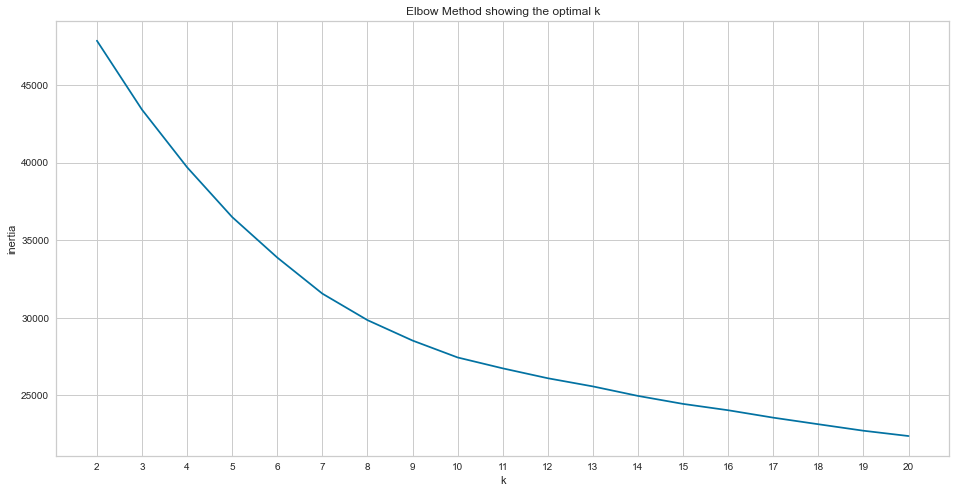

In [16]:
elbowing(X_scaled_df)

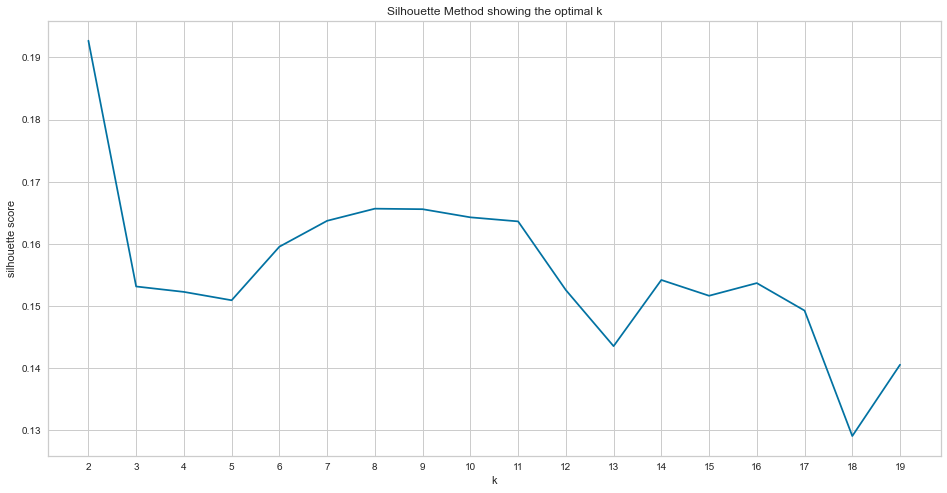

In [17]:
silhouetting(X_scaled_df)

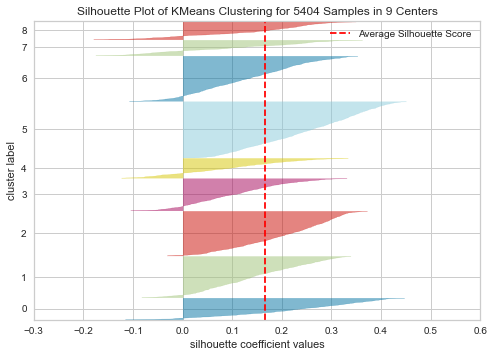

In [18]:
yellowbricking(X_scaled_df, n)

In [21]:
save_pkl(X, 'model/X.pickle')
save_pkl(X_scaled_df, 'model/X_scaled_df.pickle')
save_pkl(sp_library, ('model/sp_library.pickle'))